# 1) Goal
## classify the Size_Categorie using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

from sklearn. preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,roc_curve
from sklearn.manifold import TSNE

# 2) Data set 

In [2]:
forest= pd.read_csv("forestfires.csv")

In [3]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


# 3) EDA 

In [6]:
forest.isnull().sum().any()

False

<AxesSubplot:>

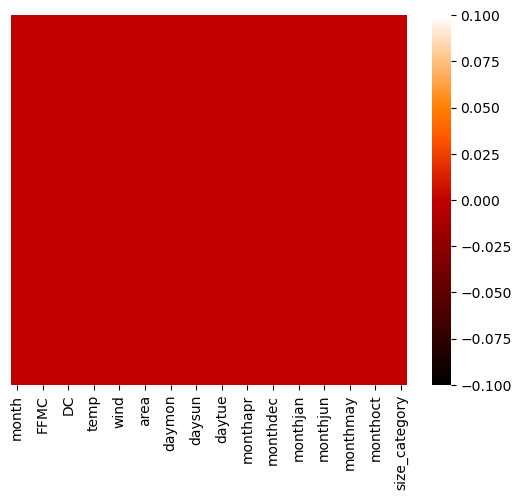

In [7]:
sns.heatmap(forest.isna(), cmap =('gist_heat'), yticklabels=False)

> No missing values

In [8]:
forest.duplicated().sum()

8

In [9]:
forest= forest.drop_duplicates()

In [10]:
forest.shape

(509, 31)

In [11]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [ ]:
forest["Num"] = [float(str(i).replace(",", "")) for i in df["Numbers"]]

> Correct datatypes

# 4) Data Visualize

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area')])

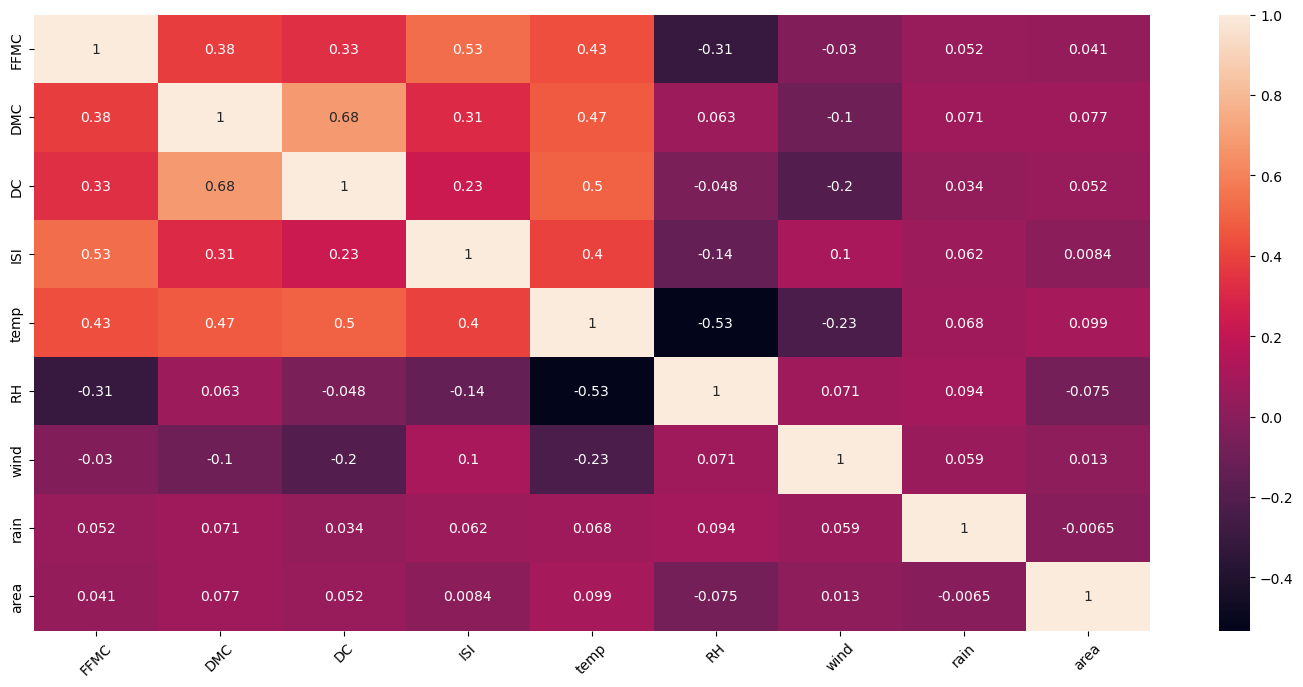

In [12]:
# Xvalues Correleation heatmap
forest1= forest.iloc[:,:11]
fig= plt.figure(figsize=(18, 8))
sns.heatmap(forest1.corr(), annot=True);
plt.xticks(rotation=45)

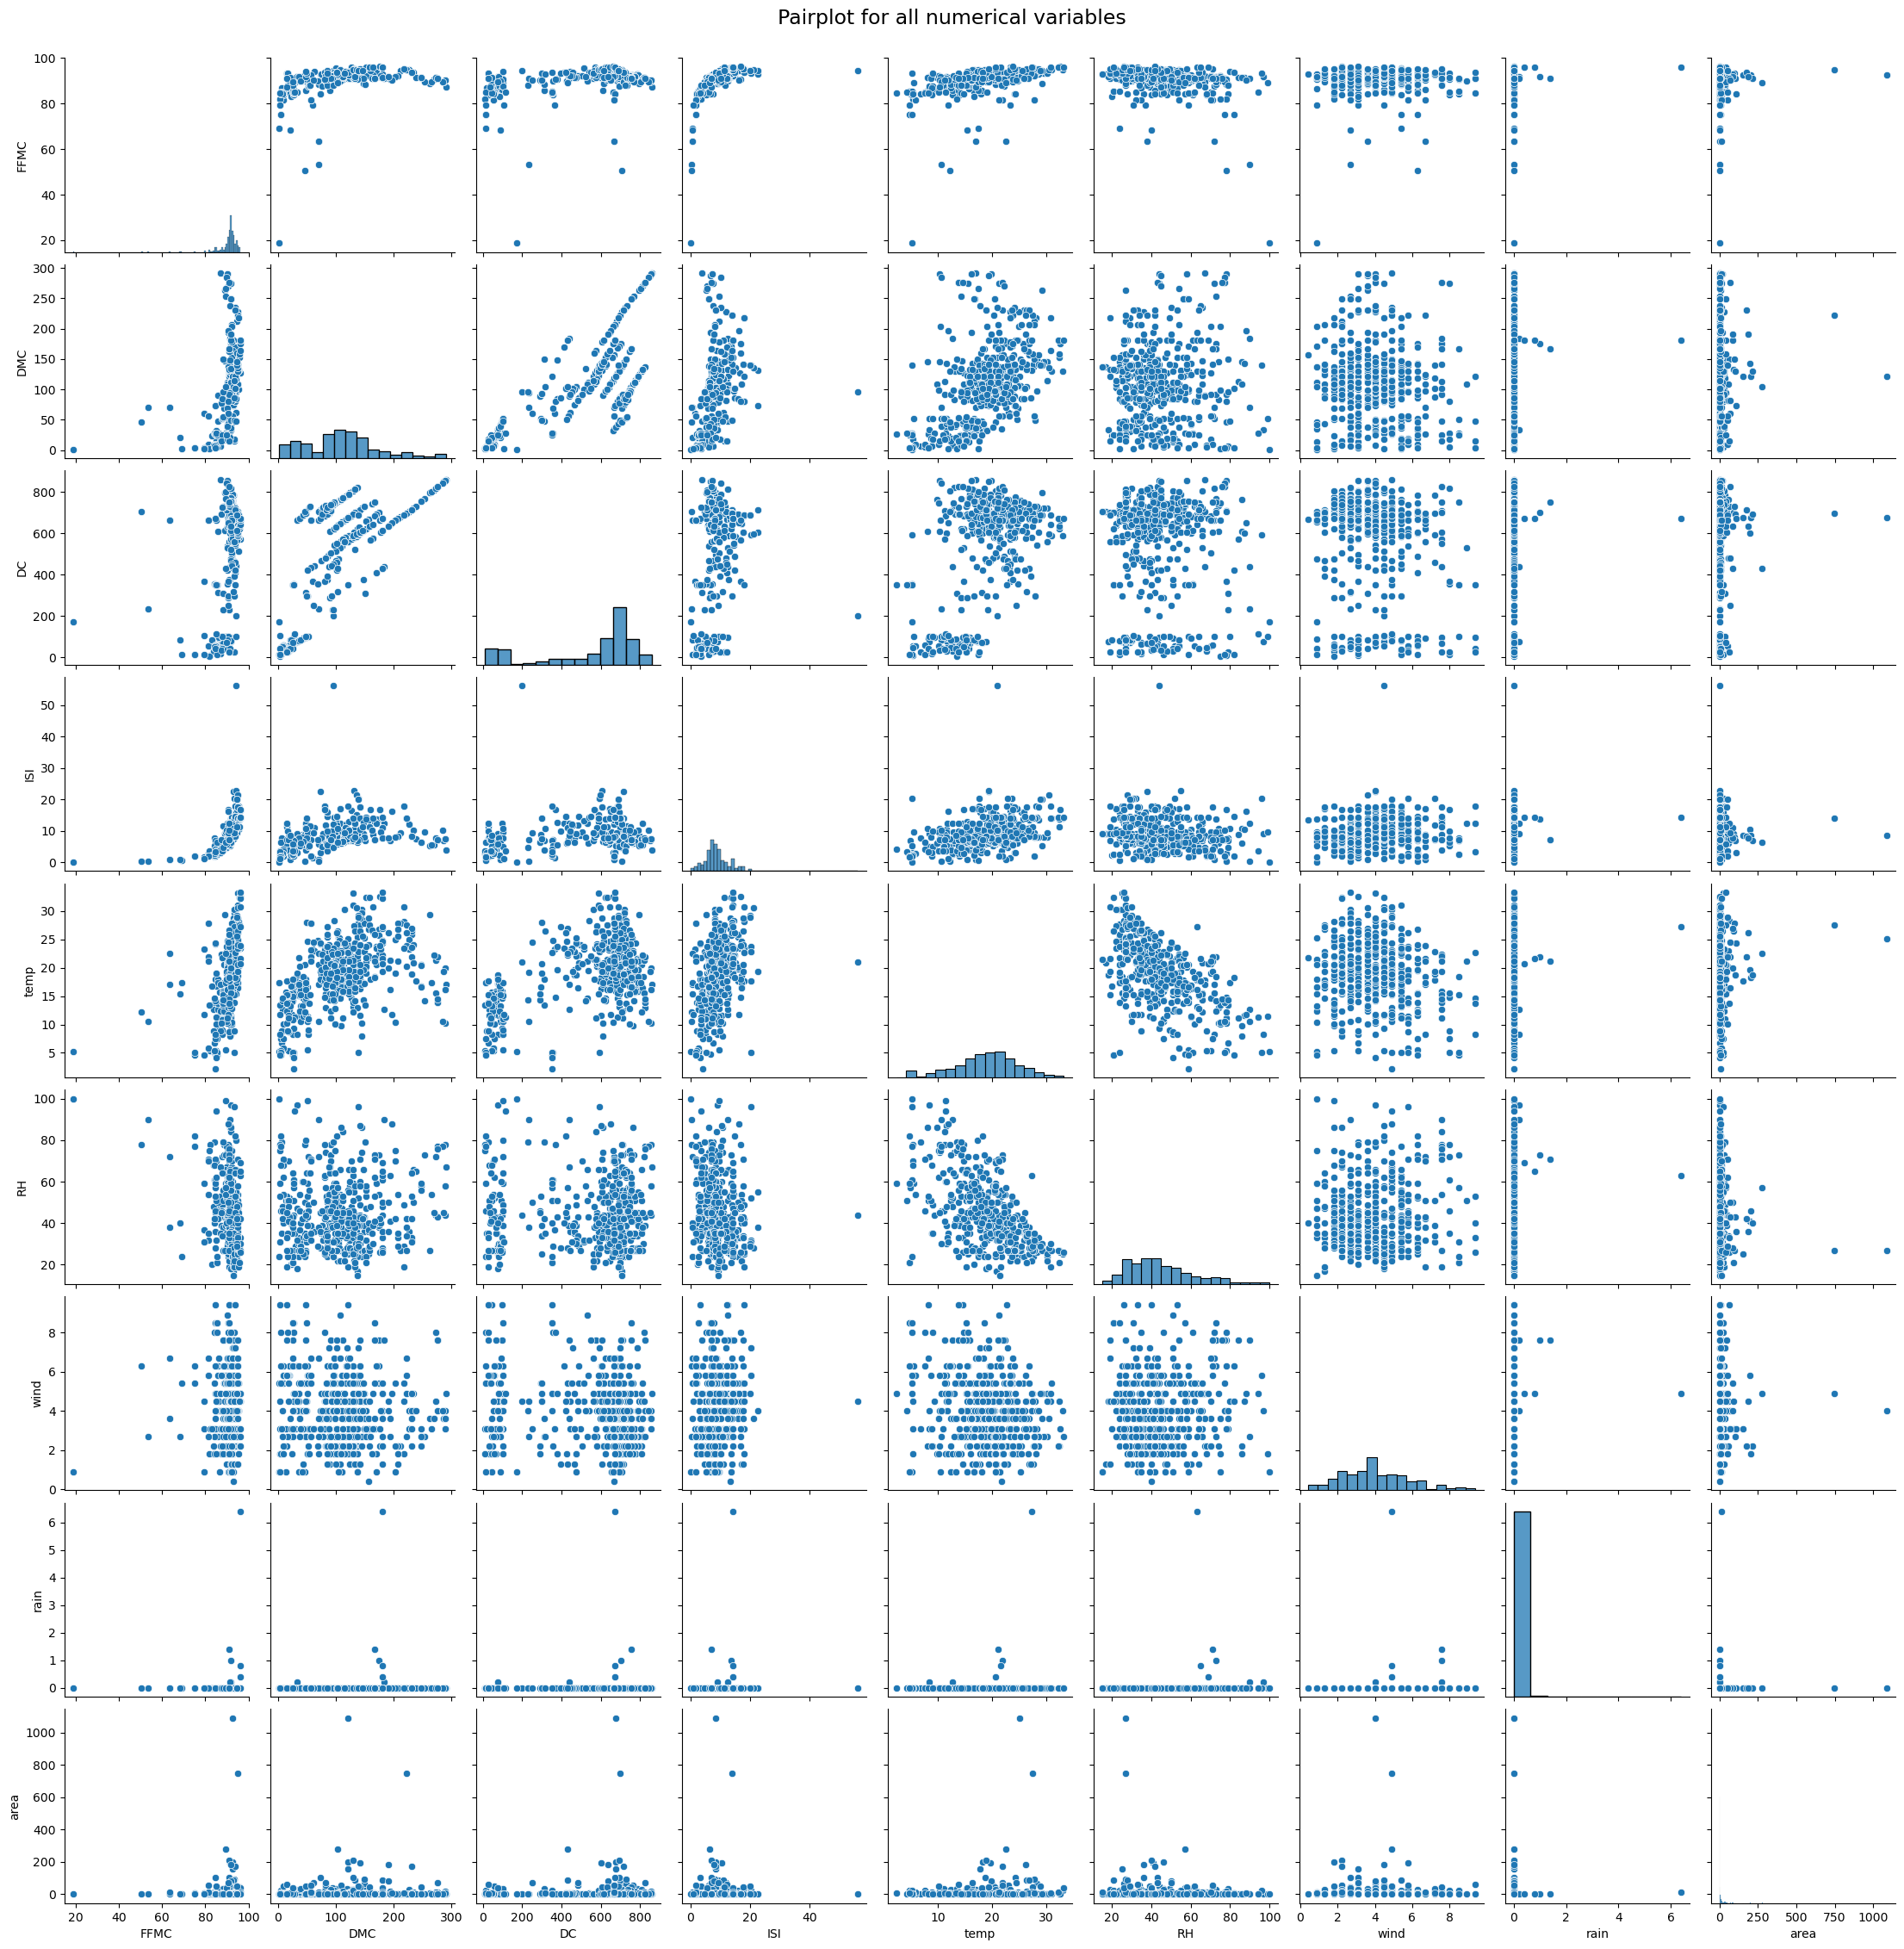

In [13]:
sns.pairplot(forest1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)
plt.show()

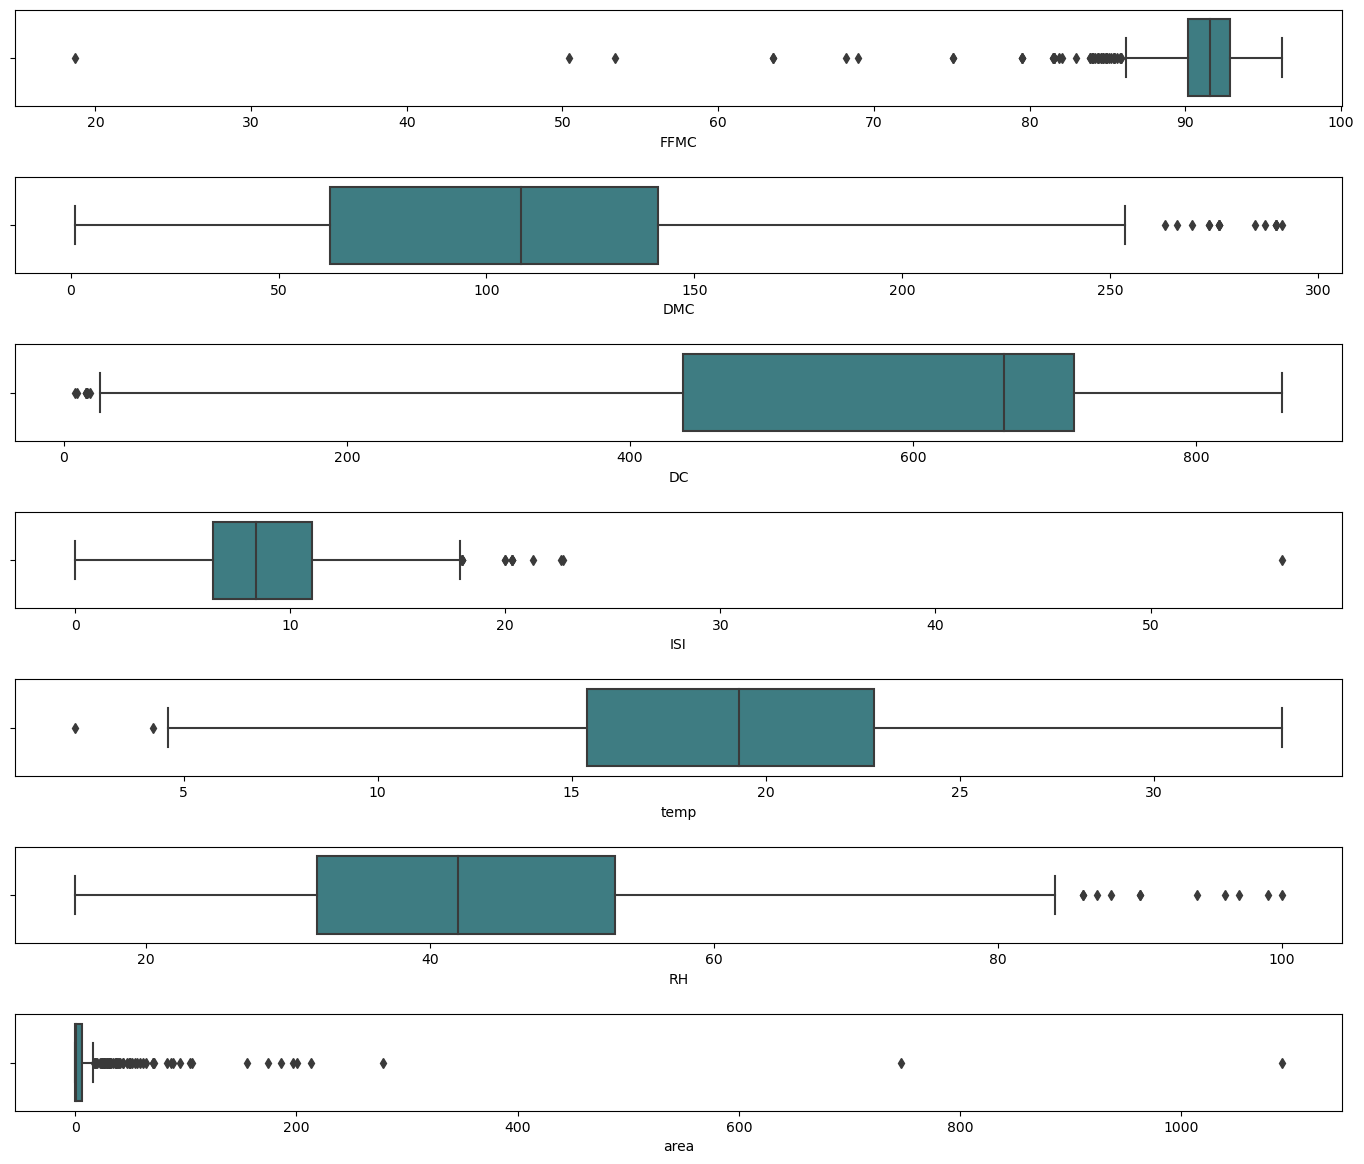

In [14]:
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=forest,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=forest,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=forest,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=forest,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=forest,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=forest,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=forest,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

> There are numerous outliers in the dataframe, but we cannot remove them because they are there in big numbers and might be useful for developing the model.

In [15]:
YY = forest[('size_category')]

small    371
large    138
Name: size_category, dtype: int64

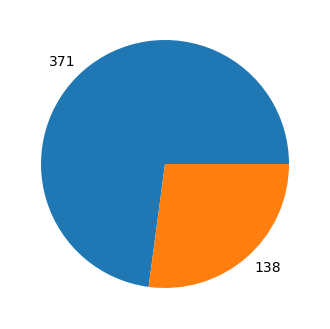

In [16]:
plt.figure(figsize=(4,8))
plt.pie(YY.value_counts(), labels=YY.value_counts())
YY.value_counts()

In [17]:
month_df = forest.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head()

,size_category,month,count
11,small,aug,135
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42


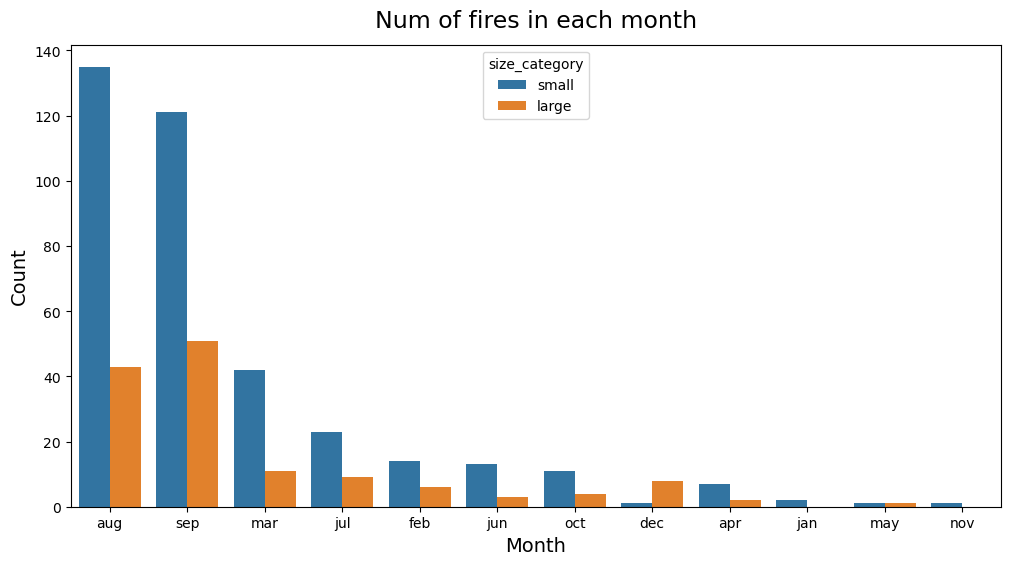

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

> Aug has highest number of small fires 

> Sept has highest number of large fires

In [19]:
day_df = forest.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df.head()

,size_category,day,count
10,small,sun,67
7,small,fri,62
9,small,sat,57
8,small,mon,55
11,small,thu,47


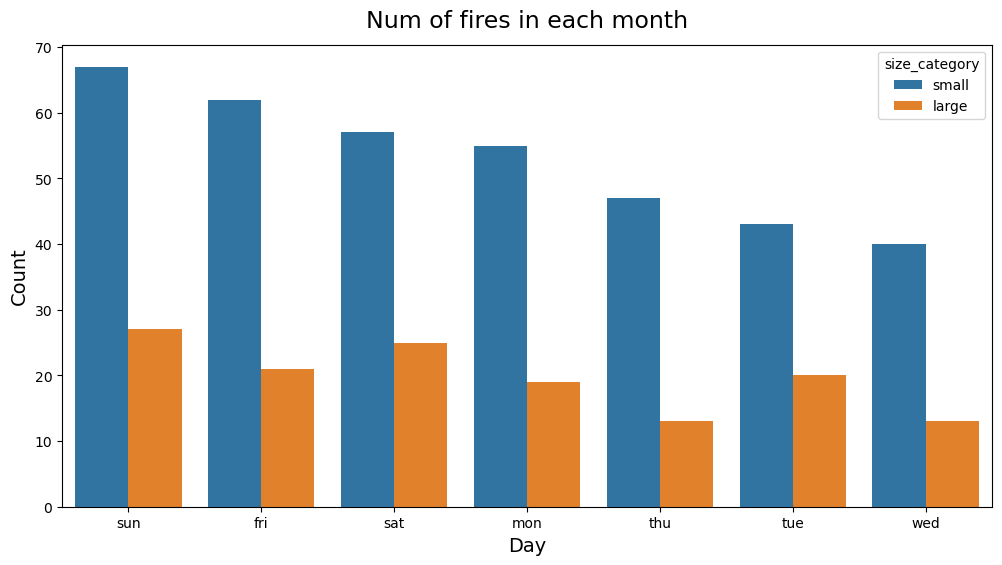

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

> Sun has highest small fires

> Sat has highest large fires

## 5. Data Pre-Processing

In [21]:
forest_preprocessing= forest.copy()

In [22]:
forest_preprocessing.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [23]:
forest_preprocessing.drop(["month","day"],axis=1,inplace =True)

In [24]:
X = forest_preprocessing.iloc[:,0:28]

In [25]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
le = LabelEncoder()
Y=le.fit_transform(forest['size_category'])

In [27]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
##Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [29]:
X = norm_func(X)

In [30]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Spilting into X and Y

In [31]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((341, 28), (168, 28), (341,), (168,))

## Hypertunning of Parameter

In [33]:
# Create the model
model = SVC()

# Define the grid search parameters
tuned_paramerters= [{'kernel':['linear','poly','rbf', 'sigmoid'],
                     'gamma': [0.1,0.01,1,2],
                     'degree': [0, 1, 2, 3, 4, 5, 6],
                     'C': [0.4,0.45,0.5,0.55,0.6],
                    }]


param_grid = tuned_paramerters

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [34]:
grid_result= grid.fit(x_train,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV 1/5; 1/560] START C=0.4, degree=0, gamma=0.1, kernel=linear.................
[CV 1/5; 1/560] END C=0.4, degree=0, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 1/560] START C=0.4, degree=0, gamma=0.1, kernel=linear.................
[CV 2/5; 1/560] END C=0.4, degree=0, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 1/560] START C=0.4, degree=0, gamma=0.1, kernel=linear.................
[CV 3/5; 1/560] END C=0.4, degree=0, gamma=0.1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 1/560] START C=0.4, degree=0, gamma=0.1, kernel=linear.................
[CV 4/5; 1/560] END C=0.4, degree=0, gamma=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 1/560] START C=0.4, degree=0, gamma=0.1, kernel=linear.................
[CV 5/5; 1/560] END C=0.4, degree=0, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5; 2/560] START C=0.4, degree=0, gamma=0.1, kernel

[CV 5/5; 11/560] END C=0.4, degree=0, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 12/560] START C=0.4, degree=0, gamma=1, kernel=sigmoid.................
[CV 1/5; 12/560] END C=0.4, degree=0, gamma=1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 12/560] START C=0.4, degree=0, gamma=1, kernel=sigmoid.................
[CV 2/5; 12/560] END C=0.4, degree=0, gamma=1, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 12/560] START C=0.4, degree=0, gamma=1, kernel=sigmoid.................
[CV 3/5; 12/560] END C=0.4, degree=0, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 12/560] START C=0.4, degree=0, gamma=1, kernel=sigmoid.................
[CV 4/5; 12/560] END C=0.4, degree=0, gamma=1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 12/560] START C=0.4, degree=0, gamma=1, kernel=sigmoid.................
[CV 5/5; 12/560] END C=0.4, degree=0, gamma=1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 13/560] START C=0.4,

[CV 2/5; 21/560] END C=0.4, degree=1, gamma=0.01, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 21/560] START C=0.4, degree=1, gamma=0.01, kernel=linear...............
[CV 3/5; 21/560] END C=0.4, degree=1, gamma=0.01, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 21/560] START C=0.4, degree=1, gamma=0.01, kernel=linear...............
[CV 4/5; 21/560] END C=0.4, degree=1, gamma=0.01, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 21/560] START C=0.4, degree=1, gamma=0.01, kernel=linear...............
[CV 5/5; 21/560] END C=0.4, degree=1, gamma=0.01, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5; 22/560] START C=0.4, degree=1, gamma=0.01, kernel=poly.................
[CV 1/5; 22/560] END C=0.4, degree=1, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 22/560] START C=0.4, degree=1, gamma=0.01, kernel=poly.................
[CV 2/5; 22/560] END C=0.4, degree=1, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 22/560] 

[CV 3/5; 32/560] END C=0.4, degree=1, gamma=2, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 32/560] START C=0.4, degree=1, gamma=2, kernel=sigmoid.................
[CV 4/5; 32/560] END C=0.4, degree=1, gamma=2, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 32/560] START C=0.4, degree=1, gamma=2, kernel=sigmoid.................
[CV 5/5; 32/560] END C=0.4, degree=1, gamma=2, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 33/560] START C=0.4, degree=2, gamma=0.1, kernel=linear................
[CV 1/5; 33/560] END C=0.4, degree=2, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 33/560] START C=0.4, degree=2, gamma=0.1, kernel=linear................
[CV 2/5; 33/560] END C=0.4, degree=2, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 33/560] START C=0.4, degree=2, gamma=0.1, kernel=linear................
[CV 3/5; 33/560] END C=0.4, degree=2, gamma=0.1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 33/560] START

[CV 1/5; 43/560] END C=0.4, degree=2, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 43/560] START C=0.4, degree=2, gamma=1, kernel=rbf.....................
[CV 2/5; 43/560] END C=0.4, degree=2, gamma=1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 43/560] START C=0.4, degree=2, gamma=1, kernel=rbf.....................
[CV 3/5; 43/560] END C=0.4, degree=2, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 43/560] START C=0.4, degree=2, gamma=1, kernel=rbf.....................
[CV 4/5; 43/560] END C=0.4, degree=2, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 43/560] START C=0.4, degree=2, gamma=1, kernel=rbf.....................
[CV 5/5; 43/560] END C=0.4, degree=2, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 44/560] START C=0.4, degree=2, gamma=1, kernel=sigmoid.................
[CV 1/5; 44/560] END C=0.4, degree=2, gamma=1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 44/560] START C=0.4, degree=2, gamma

[CV 2/5; 54/560] END C=0.4, degree=3, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 54/560] START C=0.4, degree=3, gamma=0.01, kernel=poly.................
[CV 3/5; 54/560] END C=0.4, degree=3, gamma=0.01, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 54/560] START C=0.4, degree=3, gamma=0.01, kernel=poly.................
[CV 4/5; 54/560] END C=0.4, degree=3, gamma=0.01, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 54/560] START C=0.4, degree=3, gamma=0.01, kernel=poly.................
[CV 5/5; 54/560] END C=0.4, degree=3, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 55/560] START C=0.4, degree=3, gamma=0.01, kernel=rbf..................
[CV 1/5; 55/560] END C=0.4, degree=3, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 55/560] START C=0.4, degree=3, gamma=0.01, kernel=rbf..................
[CV 2/5; 55/560] END C=0.4, degree=3, gamma=0.01, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 55/560] START C=0.

[CV 2/5; 65/560] END C=0.4, degree=4, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 65/560] START C=0.4, degree=4, gamma=0.1, kernel=linear................
[CV 3/5; 65/560] END C=0.4, degree=4, gamma=0.1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 65/560] START C=0.4, degree=4, gamma=0.1, kernel=linear................
[CV 4/5; 65/560] END C=0.4, degree=4, gamma=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 65/560] START C=0.4, degree=4, gamma=0.1, kernel=linear................
[CV 5/5; 65/560] END C=0.4, degree=4, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5; 66/560] START C=0.4, degree=4, gamma=0.1, kernel=poly..................
[CV 1/5; 66/560] END C=0.4, degree=4, gamma=0.1, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 66/560] START C=0.4, degree=4, gamma=0.1, kernel=poly..................
[CV 2/5; 66/560] END C=0.4, degree=4, gamma=0.1, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 66/560] START 

[CV 1/5; 76/560] END C=0.4, degree=4, gamma=1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 76/560] START C=0.4, degree=4, gamma=1, kernel=sigmoid.................
[CV 2/5; 76/560] END C=0.4, degree=4, gamma=1, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 76/560] START C=0.4, degree=4, gamma=1, kernel=sigmoid.................
[CV 3/5; 76/560] END C=0.4, degree=4, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 76/560] START C=0.4, degree=4, gamma=1, kernel=sigmoid.................
[CV 4/5; 76/560] END C=0.4, degree=4, gamma=1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 76/560] START C=0.4, degree=4, gamma=1, kernel=sigmoid.................
[CV 5/5; 76/560] END C=0.4, degree=4, gamma=1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 77/560] START C=0.4, degree=4, gamma=2, kernel=linear..................
[CV 1/5; 77/560] END C=0.4, degree=4, gamma=2, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 77/560] START C=0

[CV 5/5; 85/560] END C=0.4, degree=5, gamma=0.01, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5; 86/560] START C=0.4, degree=5, gamma=0.01, kernel=poly.................
[CV 1/5; 86/560] END C=0.4, degree=5, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 86/560] START C=0.4, degree=5, gamma=0.01, kernel=poly.................
[CV 2/5; 86/560] END C=0.4, degree=5, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 86/560] START C=0.4, degree=5, gamma=0.01, kernel=poly.................
[CV 3/5; 86/560] END C=0.4, degree=5, gamma=0.01, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 86/560] START C=0.4, degree=5, gamma=0.01, kernel=poly.................
[CV 4/5; 86/560] END C=0.4, degree=5, gamma=0.01, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 86/560] START C=0.4, degree=5, gamma=0.01, kernel=poly.................
[CV 5/5; 86/560] END C=0.4, degree=5, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 87/560] START 

[CV 1/5; 96/560] END C=0.4, degree=5, gamma=2, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 96/560] START C=0.4, degree=5, gamma=2, kernel=sigmoid.................
[CV 2/5; 96/560] END C=0.4, degree=5, gamma=2, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 96/560] START C=0.4, degree=5, gamma=2, kernel=sigmoid.................
[CV 3/5; 96/560] END C=0.4, degree=5, gamma=2, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 96/560] START C=0.4, degree=5, gamma=2, kernel=sigmoid.................
[CV 4/5; 96/560] END C=0.4, degree=5, gamma=2, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 96/560] START C=0.4, degree=5, gamma=2, kernel=sigmoid.................
[CV 5/5; 96/560] END C=0.4, degree=5, gamma=2, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 97/560] START C=0.4, degree=6, gamma=0.1, kernel=linear................
[CV 1/5; 97/560] END C=0.4, degree=6, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 97/560] START C

[CV 2/5; 106/560] END C=0.4, degree=6, gamma=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 3/5; 106/560] START C=0.4, degree=6, gamma=1, kernel=poly...................
[CV 3/5; 106/560] END C=0.4, degree=6, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 4/5; 106/560] START C=0.4, degree=6, gamma=1, kernel=poly...................
[CV 4/5; 106/560] END C=0.4, degree=6, gamma=1, kernel=poly;, score=0.603 total time=   0.0s
[CV 5/5; 106/560] START C=0.4, degree=6, gamma=1, kernel=poly...................
[CV 5/5; 106/560] END C=0.4, degree=6, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 107/560] START C=0.4, degree=6, gamma=1, kernel=rbf....................
[CV 1/5; 107/560] END C=0.4, degree=6, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 107/560] START C=0.4, degree=6, gamma=1, kernel=rbf....................
[CV 2/5; 107/560] END C=0.4, degree=6, gamma=1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 107/560] START C=0.4, degree=6

[CV 1/5; 118/560] END C=0.45, degree=0, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 118/560] START C=0.45, degree=0, gamma=0.01, kernel=poly...............
[CV 2/5; 118/560] END C=0.45, degree=0, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 118/560] START C=0.45, degree=0, gamma=0.01, kernel=poly...............
[CV 3/5; 118/560] END C=0.45, degree=0, gamma=0.01, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 118/560] START C=0.45, degree=0, gamma=0.01, kernel=poly...............
[CV 4/5; 118/560] END C=0.45, degree=0, gamma=0.01, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 118/560] START C=0.45, degree=0, gamma=0.01, kernel=poly...............
[CV 5/5; 118/560] END C=0.45, degree=0, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 119/560] START C=0.45, degree=0, gamma=0.01, kernel=rbf................
[CV 1/5; 119/560] END C=0.45, degree=0, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 119/5

[CV 3/5; 127/560] END C=0.45, degree=0, gamma=2, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 127/560] START C=0.45, degree=0, gamma=2, kernel=rbf...................
[CV 4/5; 127/560] END C=0.45, degree=0, gamma=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 127/560] START C=0.45, degree=0, gamma=2, kernel=rbf...................
[CV 5/5; 127/560] END C=0.45, degree=0, gamma=2, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 128/560] START C=0.45, degree=0, gamma=2, kernel=sigmoid...............
[CV 1/5; 128/560] END C=0.45, degree=0, gamma=2, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 128/560] START C=0.45, degree=0, gamma=2, kernel=sigmoid...............
[CV 2/5; 128/560] END C=0.45, degree=0, gamma=2, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 128/560] START C=0.45, degree=0, gamma=2, kernel=sigmoid...............
[CV 3/5; 128/560] END C=0.45, degree=0, gamma=2, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 128/560] START C

[CV 3/5; 137/560] END C=0.45, degree=1, gamma=1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 137/560] START C=0.45, degree=1, gamma=1, kernel=linear................
[CV 4/5; 137/560] END C=0.45, degree=1, gamma=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 137/560] START C=0.45, degree=1, gamma=1, kernel=linear................
[CV 5/5; 137/560] END C=0.45, degree=1, gamma=1, kernel=linear;, score=0.794 total time=   0.0s
[CV 1/5; 138/560] START C=0.45, degree=1, gamma=1, kernel=poly..................
[CV 1/5; 138/560] END C=0.45, degree=1, gamma=1, kernel=poly;, score=0.725 total time=   0.0s
[CV 2/5; 138/560] START C=0.45, degree=1, gamma=1, kernel=poly..................
[CV 2/5; 138/560] END C=0.45, degree=1, gamma=1, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 138/560] START C=0.45, degree=1, gamma=1, kernel=poly..................
[CV 3/5; 138/560] END C=0.45, degree=1, gamma=1, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 138/560] START C

[CV 5/5; 148/560] END C=0.45, degree=2, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 149/560] START C=0.45, degree=2, gamma=0.01, kernel=linear.............
[CV 1/5; 149/560] END C=0.45, degree=2, gamma=0.01, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 149/560] START C=0.45, degree=2, gamma=0.01, kernel=linear.............
[CV 2/5; 149/560] END C=0.45, degree=2, gamma=0.01, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 149/560] START C=0.45, degree=2, gamma=0.01, kernel=linear.............
[CV 3/5; 149/560] END C=0.45, degree=2, gamma=0.01, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 149/560] START C=0.45, degree=2, gamma=0.01, kernel=linear.............
[CV 4/5; 149/560] END C=0.45, degree=2, gamma=0.01, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 149/560] START C=0.45, degree=2, gamma=0.01, kernel=linear.............
[CV 5/5; 149/560] END C=0.45, degree=2, gamma=0.01, kernel=linear;, score=0.794 total time=   0.0s
[

[CV 1/5; 159/560] END C=0.45, degree=2, gamma=2, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 159/560] START C=0.45, degree=2, gamma=2, kernel=rbf...................
[CV 2/5; 159/560] END C=0.45, degree=2, gamma=2, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 159/560] START C=0.45, degree=2, gamma=2, kernel=rbf...................
[CV 3/5; 159/560] END C=0.45, degree=2, gamma=2, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 159/560] START C=0.45, degree=2, gamma=2, kernel=rbf...................
[CV 4/5; 159/560] END C=0.45, degree=2, gamma=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 159/560] START C=0.45, degree=2, gamma=2, kernel=rbf...................
[CV 5/5; 159/560] END C=0.45, degree=2, gamma=2, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 160/560] START C=0.45, degree=2, gamma=2, kernel=sigmoid...............
[CV 1/5; 160/560] END C=0.45, degree=2, gamma=2, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 160/560] START C=0.45, d

[CV 1/5; 170/560] END C=0.45, degree=3, gamma=1, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 170/560] START C=0.45, degree=3, gamma=1, kernel=poly..................
[CV 2/5; 170/560] END C=0.45, degree=3, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 3/5; 170/560] START C=0.45, degree=3, gamma=1, kernel=poly..................
[CV 3/5; 170/560] END C=0.45, degree=3, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 4/5; 170/560] START C=0.45, degree=3, gamma=1, kernel=poly..................
[CV 4/5; 170/560] END C=0.45, degree=3, gamma=1, kernel=poly;, score=0.676 total time=   0.0s
[CV 5/5; 170/560] START C=0.45, degree=3, gamma=1, kernel=poly..................
[CV 5/5; 170/560] END C=0.45, degree=3, gamma=1, kernel=poly;, score=0.721 total time=   0.0s
[CV 1/5; 171/560] START C=0.45, degree=3, gamma=1, kernel=rbf...................
[CV 1/5; 171/560] END C=0.45, degree=3, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 171/560] START C=0.45, 

[CV 2/5; 180/560] END C=0.45, degree=4, gamma=0.1, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 180/560] START C=0.45, degree=4, gamma=0.1, kernel=sigmoid.............
[CV 3/5; 180/560] END C=0.45, degree=4, gamma=0.1, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 180/560] START C=0.45, degree=4, gamma=0.1, kernel=sigmoid.............
[CV 4/5; 180/560] END C=0.45, degree=4, gamma=0.1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 180/560] START C=0.45, degree=4, gamma=0.1, kernel=sigmoid.............
[CV 5/5; 180/560] END C=0.45, degree=4, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 181/560] START C=0.45, degree=4, gamma=0.01, kernel=linear.............
[CV 1/5; 181/560] END C=0.45, degree=4, gamma=0.01, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 181/560] START C=0.45, degree=4, gamma=0.01, kernel=linear.............
[CV 2/5; 181/560] END C=0.45, degree=4, gamma=0.01, kernel=linear;, score=0.735 total time=   0.0s
[

[CV 1/5; 190/560] END C=0.45, degree=4, gamma=2, kernel=poly;, score=0.768 total time=   0.0s
[CV 2/5; 190/560] START C=0.45, degree=4, gamma=2, kernel=poly..................
[CV 2/5; 190/560] END C=0.45, degree=4, gamma=2, kernel=poly;, score=0.691 total time=   0.0s
[CV 3/5; 190/560] START C=0.45, degree=4, gamma=2, kernel=poly..................
[CV 3/5; 190/560] END C=0.45, degree=4, gamma=2, kernel=poly;, score=0.706 total time=   0.0s
[CV 4/5; 190/560] START C=0.45, degree=4, gamma=2, kernel=poly..................
[CV 4/5; 190/560] END C=0.45, degree=4, gamma=2, kernel=poly;, score=0.662 total time=   0.0s
[CV 5/5; 190/560] START C=0.45, degree=4, gamma=2, kernel=poly..................
[CV 5/5; 190/560] END C=0.45, degree=4, gamma=2, kernel=poly;, score=0.735 total time=   0.0s
[CV 1/5; 191/560] START C=0.45, degree=4, gamma=2, kernel=rbf...................
[CV 1/5; 191/560] END C=0.45, degree=4, gamma=2, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 191/560] START C=0.45, 

[CV 3/5; 199/560] END C=0.45, degree=5, gamma=0.01, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 199/560] START C=0.45, degree=5, gamma=0.01, kernel=rbf................
[CV 4/5; 199/560] END C=0.45, degree=5, gamma=0.01, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 199/560] START C=0.45, degree=5, gamma=0.01, kernel=rbf................
[CV 5/5; 199/560] END C=0.45, degree=5, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 200/560] START C=0.45, degree=5, gamma=0.01, kernel=sigmoid............
[CV 1/5; 200/560] END C=0.45, degree=5, gamma=0.01, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 200/560] START C=0.45, degree=5, gamma=0.01, kernel=sigmoid............
[CV 2/5; 200/560] END C=0.45, degree=5, gamma=0.01, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 200/560] START C=0.45, degree=5, gamma=0.01, kernel=sigmoid............
[CV 3/5; 200/560] END C=0.45, degree=5, gamma=0.01, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5

[CV 5/5; 208/560] END C=0.45, degree=5, gamma=2, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 209/560] START C=0.45, degree=6, gamma=0.1, kernel=linear..............
[CV 1/5; 209/560] END C=0.45, degree=6, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 209/560] START C=0.45, degree=6, gamma=0.1, kernel=linear..............
[CV 2/5; 209/560] END C=0.45, degree=6, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 209/560] START C=0.45, degree=6, gamma=0.1, kernel=linear..............
[CV 3/5; 209/560] END C=0.45, degree=6, gamma=0.1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 209/560] START C=0.45, degree=6, gamma=0.1, kernel=linear..............
[CV 4/5; 209/560] END C=0.45, degree=6, gamma=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 209/560] START C=0.45, degree=6, gamma=0.1, kernel=linear..............
[CV 5/5; 209/560] END C=0.45, degree=6, gamma=0.1, kernel=linear;, score=0.794 total time=   0.0s
[CV 1/5;

[CV 2/5; 219/560] END C=0.45, degree=6, gamma=1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 219/560] START C=0.45, degree=6, gamma=1, kernel=rbf...................
[CV 3/5; 219/560] END C=0.45, degree=6, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 219/560] START C=0.45, degree=6, gamma=1, kernel=rbf...................
[CV 4/5; 219/560] END C=0.45, degree=6, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 219/560] START C=0.45, degree=6, gamma=1, kernel=rbf...................
[CV 5/5; 219/560] END C=0.45, degree=6, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 220/560] START C=0.45, degree=6, gamma=1, kernel=sigmoid...............
[CV 1/5; 220/560] END C=0.45, degree=6, gamma=1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 220/560] START C=0.45, degree=6, gamma=1, kernel=sigmoid...............
[CV 2/5; 220/560] END C=0.45, degree=6, gamma=1, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 220/560] START C=0.4

[CV 5/5; 229/560] END C=0.5, degree=0, gamma=0.01, kernel=linear;, score=0.794 total time=   0.0s
[CV 1/5; 230/560] START C=0.5, degree=0, gamma=0.01, kernel=poly................
[CV 1/5; 230/560] END C=0.5, degree=0, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 230/560] START C=0.5, degree=0, gamma=0.01, kernel=poly................
[CV 2/5; 230/560] END C=0.5, degree=0, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 230/560] START C=0.5, degree=0, gamma=0.01, kernel=poly................
[CV 3/5; 230/560] END C=0.5, degree=0, gamma=0.01, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 230/560] START C=0.5, degree=0, gamma=0.01, kernel=poly................
[CV 4/5; 230/560] END C=0.5, degree=0, gamma=0.01, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 230/560] START C=0.5, degree=0, gamma=0.01, kernel=poly................
[CV 5/5; 230/560] END C=0.5, degree=0, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 231/560]

[CV 5/5; 239/560] END C=0.5, degree=0, gamma=2, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 240/560] START C=0.5, degree=0, gamma=2, kernel=sigmoid................
[CV 1/5; 240/560] END C=0.5, degree=0, gamma=2, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 240/560] START C=0.5, degree=0, gamma=2, kernel=sigmoid................
[CV 2/5; 240/560] END C=0.5, degree=0, gamma=2, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 240/560] START C=0.5, degree=0, gamma=2, kernel=sigmoid................
[CV 3/5; 240/560] END C=0.5, degree=0, gamma=2, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 240/560] START C=0.5, degree=0, gamma=2, kernel=sigmoid................
[CV 4/5; 240/560] END C=0.5, degree=0, gamma=2, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 240/560] START C=0.5, degree=0, gamma=2, kernel=sigmoid................
[CV 5/5; 240/560] END C=0.5, degree=0, gamma=2, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 241/560] START

[CV 1/5; 250/560] END C=0.5, degree=1, gamma=1, kernel=poly;, score=0.725 total time=   0.0s
[CV 2/5; 250/560] START C=0.5, degree=1, gamma=1, kernel=poly...................
[CV 2/5; 250/560] END C=0.5, degree=1, gamma=1, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 250/560] START C=0.5, degree=1, gamma=1, kernel=poly...................
[CV 3/5; 250/560] END C=0.5, degree=1, gamma=1, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 250/560] START C=0.5, degree=1, gamma=1, kernel=poly...................
[CV 4/5; 250/560] END C=0.5, degree=1, gamma=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 250/560] START C=0.5, degree=1, gamma=1, kernel=poly...................
[CV 5/5; 250/560] END C=0.5, degree=1, gamma=1, kernel=poly;, score=0.794 total time=   0.0s
[CV 1/5; 251/560] START C=0.5, degree=1, gamma=1, kernel=rbf....................
[CV 1/5; 251/560] END C=0.5, degree=1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 251/560] START C=0.5, degree=

[CV 4/5; 261/560] END C=0.5, degree=2, gamma=0.01, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 261/560] START C=0.5, degree=2, gamma=0.01, kernel=linear..............
[CV 5/5; 261/560] END C=0.5, degree=2, gamma=0.01, kernel=linear;, score=0.794 total time=   0.0s
[CV 1/5; 262/560] START C=0.5, degree=2, gamma=0.01, kernel=poly................
[CV 1/5; 262/560] END C=0.5, degree=2, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 262/560] START C=0.5, degree=2, gamma=0.01, kernel=poly................
[CV 2/5; 262/560] END C=0.5, degree=2, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 262/560] START C=0.5, degree=2, gamma=0.01, kernel=poly................
[CV 3/5; 262/560] END C=0.5, degree=2, gamma=0.01, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 262/560] START C=0.5, degree=2, gamma=0.01, kernel=poly................
[CV 4/5; 262/560] END C=0.5, degree=2, gamma=0.01, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 262/56

[CV 1/5; 272/560] END C=0.5, degree=2, gamma=2, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 272/560] START C=0.5, degree=2, gamma=2, kernel=sigmoid................
[CV 2/5; 272/560] END C=0.5, degree=2, gamma=2, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 272/560] START C=0.5, degree=2, gamma=2, kernel=sigmoid................
[CV 3/5; 272/560] END C=0.5, degree=2, gamma=2, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 272/560] START C=0.5, degree=2, gamma=2, kernel=sigmoid................
[CV 4/5; 272/560] END C=0.5, degree=2, gamma=2, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 272/560] START C=0.5, degree=2, gamma=2, kernel=sigmoid................
[CV 5/5; 272/560] END C=0.5, degree=2, gamma=2, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 273/560] START C=0.5, degree=3, gamma=0.1, kernel=linear...............
[CV 1/5; 273/560] END C=0.5, degree=3, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 273/560] 

[CV 1/5; 283/560] END C=0.5, degree=3, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 283/560] START C=0.5, degree=3, gamma=1, kernel=rbf....................
[CV 2/5; 283/560] END C=0.5, degree=3, gamma=1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 283/560] START C=0.5, degree=3, gamma=1, kernel=rbf....................
[CV 3/5; 283/560] END C=0.5, degree=3, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 283/560] START C=0.5, degree=3, gamma=1, kernel=rbf....................
[CV 4/5; 283/560] END C=0.5, degree=3, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 283/560] START C=0.5, degree=3, gamma=1, kernel=rbf....................
[CV 5/5; 283/560] END C=0.5, degree=3, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 284/560] START C=0.5, degree=3, gamma=1, kernel=sigmoid................
[CV 1/5; 284/560] END C=0.5, degree=3, gamma=1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 284/560] START C=0.5, degree=3

[CV 3/5; 293/560] END C=0.5, degree=4, gamma=0.01, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 293/560] START C=0.5, degree=4, gamma=0.01, kernel=linear..............
[CV 4/5; 293/560] END C=0.5, degree=4, gamma=0.01, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 293/560] START C=0.5, degree=4, gamma=0.01, kernel=linear..............
[CV 5/5; 293/560] END C=0.5, degree=4, gamma=0.01, kernel=linear;, score=0.794 total time=   0.0s
[CV 1/5; 294/560] START C=0.5, degree=4, gamma=0.01, kernel=poly................
[CV 1/5; 294/560] END C=0.5, degree=4, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 294/560] START C=0.5, degree=4, gamma=0.01, kernel=poly................
[CV 2/5; 294/560] END C=0.5, degree=4, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 294/560] START C=0.5, degree=4, gamma=0.01, kernel=poly................
[CV 3/5; 294/560] END C=0.5, degree=4, gamma=0.01, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 294/

[CV 5/5; 302/560] END C=0.5, degree=4, gamma=2, kernel=poly;, score=0.735 total time=   0.0s
[CV 1/5; 303/560] START C=0.5, degree=4, gamma=2, kernel=rbf....................
[CV 1/5; 303/560] END C=0.5, degree=4, gamma=2, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 303/560] START C=0.5, degree=4, gamma=2, kernel=rbf....................
[CV 2/5; 303/560] END C=0.5, degree=4, gamma=2, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 303/560] START C=0.5, degree=4, gamma=2, kernel=rbf....................
[CV 3/5; 303/560] END C=0.5, degree=4, gamma=2, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 303/560] START C=0.5, degree=4, gamma=2, kernel=rbf....................
[CV 4/5; 303/560] END C=0.5, degree=4, gamma=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 303/560] START C=0.5, degree=4, gamma=2, kernel=rbf....................
[CV 5/5; 303/560] END C=0.5, degree=4, gamma=2, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 304/560] START C=0.5, degree=4, g

[CV 3/5; 313/560] END C=0.5, degree=5, gamma=1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 313/560] START C=0.5, degree=5, gamma=1, kernel=linear.................
[CV 4/5; 313/560] END C=0.5, degree=5, gamma=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 313/560] START C=0.5, degree=5, gamma=1, kernel=linear.................
[CV 5/5; 313/560] END C=0.5, degree=5, gamma=1, kernel=linear;, score=0.794 total time=   0.0s
[CV 1/5; 314/560] START C=0.5, degree=5, gamma=1, kernel=poly...................
[CV 1/5; 314/560] END C=0.5, degree=5, gamma=1, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 314/560] START C=0.5, degree=5, gamma=1, kernel=poly...................
[CV 2/5; 314/560] END C=0.5, degree=5, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 3/5; 314/560] START C=0.5, degree=5, gamma=1, kernel=poly...................
[CV 3/5; 314/560] END C=0.5, degree=5, gamma=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 4/5; 314/560] START C=0.5, 

[CV 5/5; 322/560] END C=0.5, degree=6, gamma=0.1, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 323/560] START C=0.5, degree=6, gamma=0.1, kernel=rbf..................
[CV 1/5; 323/560] END C=0.5, degree=6, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 323/560] START C=0.5, degree=6, gamma=0.1, kernel=rbf..................
[CV 2/5; 323/560] END C=0.5, degree=6, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 323/560] START C=0.5, degree=6, gamma=0.1, kernel=rbf..................
[CV 3/5; 323/560] END C=0.5, degree=6, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 323/560] START C=0.5, degree=6, gamma=0.1, kernel=rbf..................
[CV 4/5; 323/560] END C=0.5, degree=6, gamma=0.1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 323/560] START C=0.5, degree=6, gamma=0.1, kernel=rbf..................
[CV 5/5; 323/560] END C=0.5, degree=6, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 324/560] START C=0.5,

[CV 4/5; 332/560] END C=0.5, degree=6, gamma=1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 332/560] START C=0.5, degree=6, gamma=1, kernel=sigmoid................
[CV 5/5; 332/560] END C=0.5, degree=6, gamma=1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 333/560] START C=0.5, degree=6, gamma=2, kernel=linear.................
[CV 1/5; 333/560] END C=0.5, degree=6, gamma=2, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 333/560] START C=0.5, degree=6, gamma=2, kernel=linear.................
[CV 2/5; 333/560] END C=0.5, degree=6, gamma=2, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 333/560] START C=0.5, degree=6, gamma=2, kernel=linear.................
[CV 3/5; 333/560] END C=0.5, degree=6, gamma=2, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 333/560] START C=0.5, degree=6, gamma=2, kernel=linear.................
[CV 4/5; 333/560] END C=0.5, degree=6, gamma=2, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 333/560] START

[CV 2/5; 342/560] END C=0.55, degree=0, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 342/560] START C=0.55, degree=0, gamma=0.01, kernel=poly...............
[CV 3/5; 342/560] END C=0.55, degree=0, gamma=0.01, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 342/560] START C=0.55, degree=0, gamma=0.01, kernel=poly...............
[CV 4/5; 342/560] END C=0.55, degree=0, gamma=0.01, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 342/560] START C=0.55, degree=0, gamma=0.01, kernel=poly...............
[CV 5/5; 342/560] END C=0.55, degree=0, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 343/560] START C=0.55, degree=0, gamma=0.01, kernel=rbf................
[CV 1/5; 343/560] END C=0.55, degree=0, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 343/560] START C=0.55, degree=0, gamma=0.01, kernel=rbf................
[CV 2/5; 343/560] END C=0.55, degree=0, gamma=0.01, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 343/56

[CV 2/5; 352/560] END C=0.55, degree=0, gamma=2, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 352/560] START C=0.55, degree=0, gamma=2, kernel=sigmoid...............
[CV 3/5; 352/560] END C=0.55, degree=0, gamma=2, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 352/560] START C=0.55, degree=0, gamma=2, kernel=sigmoid...............
[CV 4/5; 352/560] END C=0.55, degree=0, gamma=2, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 352/560] START C=0.55, degree=0, gamma=2, kernel=sigmoid...............
[CV 5/5; 352/560] END C=0.55, degree=0, gamma=2, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 353/560] START C=0.55, degree=1, gamma=0.1, kernel=linear..............
[CV 1/5; 353/560] END C=0.55, degree=1, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 353/560] START C=0.55, degree=1, gamma=0.1, kernel=linear..............
[CV 2/5; 353/560] END C=0.55, degree=1, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 35

[CV 1/5; 362/560] END C=0.55, degree=1, gamma=1, kernel=poly;, score=0.725 total time=   0.0s
[CV 2/5; 362/560] START C=0.55, degree=1, gamma=1, kernel=poly..................
[CV 2/5; 362/560] END C=0.55, degree=1, gamma=1, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 362/560] START C=0.55, degree=1, gamma=1, kernel=poly..................
[CV 3/5; 362/560] END C=0.55, degree=1, gamma=1, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 362/560] START C=0.55, degree=1, gamma=1, kernel=poly..................
[CV 4/5; 362/560] END C=0.55, degree=1, gamma=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 362/560] START C=0.55, degree=1, gamma=1, kernel=poly..................
[CV 5/5; 362/560] END C=0.55, degree=1, gamma=1, kernel=poly;, score=0.809 total time=   0.0s
[CV 1/5; 363/560] START C=0.55, degree=1, gamma=1, kernel=rbf...................
[CV 1/5; 363/560] END C=0.55, degree=1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 363/560] START C=0.55, 

[CV 5/5; 371/560] END C=0.55, degree=2, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 372/560] START C=0.55, degree=2, gamma=0.1, kernel=sigmoid.............
[CV 1/5; 372/560] END C=0.55, degree=2, gamma=0.1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 372/560] START C=0.55, degree=2, gamma=0.1, kernel=sigmoid.............
[CV 2/5; 372/560] END C=0.55, degree=2, gamma=0.1, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 372/560] START C=0.55, degree=2, gamma=0.1, kernel=sigmoid.............
[CV 3/5; 372/560] END C=0.55, degree=2, gamma=0.1, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 372/560] START C=0.55, degree=2, gamma=0.1, kernel=sigmoid.............
[CV 4/5; 372/560] END C=0.55, degree=2, gamma=0.1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 372/560] START C=0.55, degree=2, gamma=0.1, kernel=sigmoid.............
[CV 5/5; 372/560] END C=0.55, degree=2, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1

[CV 2/5; 383/560] END C=0.55, degree=2, gamma=2, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 383/560] START C=0.55, degree=2, gamma=2, kernel=rbf...................
[CV 3/5; 383/560] END C=0.55, degree=2, gamma=2, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 383/560] START C=0.55, degree=2, gamma=2, kernel=rbf...................
[CV 4/5; 383/560] END C=0.55, degree=2, gamma=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 383/560] START C=0.55, degree=2, gamma=2, kernel=rbf...................
[CV 5/5; 383/560] END C=0.55, degree=2, gamma=2, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 384/560] START C=0.55, degree=2, gamma=2, kernel=sigmoid...............
[CV 1/5; 384/560] END C=0.55, degree=2, gamma=2, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 384/560] START C=0.55, degree=2, gamma=2, kernel=sigmoid...............
[CV 2/5; 384/560] END C=0.55, degree=2, gamma=2, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 384/560] START C=0.5

[CV 2/5; 394/560] END C=0.55, degree=3, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 3/5; 394/560] START C=0.55, degree=3, gamma=1, kernel=poly..................
[CV 3/5; 394/560] END C=0.55, degree=3, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 4/5; 394/560] START C=0.55, degree=3, gamma=1, kernel=poly..................
[CV 4/5; 394/560] END C=0.55, degree=3, gamma=1, kernel=poly;, score=0.647 total time=   0.0s
[CV 5/5; 394/560] START C=0.55, degree=3, gamma=1, kernel=poly..................
[CV 5/5; 394/560] END C=0.55, degree=3, gamma=1, kernel=poly;, score=0.721 total time=   0.0s
[CV 1/5; 395/560] START C=0.55, degree=3, gamma=1, kernel=rbf...................
[CV 1/5; 395/560] END C=0.55, degree=3, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 395/560] START C=0.55, degree=3, gamma=1, kernel=rbf...................
[CV 2/5; 395/560] END C=0.55, degree=3, gamma=1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 395/560] START C=0.55, d

[CV 3/5; 404/560] END C=0.55, degree=4, gamma=0.1, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 404/560] START C=0.55, degree=4, gamma=0.1, kernel=sigmoid.............
[CV 4/5; 404/560] END C=0.55, degree=4, gamma=0.1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 404/560] START C=0.55, degree=4, gamma=0.1, kernel=sigmoid.............
[CV 5/5; 404/560] END C=0.55, degree=4, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 405/560] START C=0.55, degree=4, gamma=0.01, kernel=linear.............
[CV 1/5; 405/560] END C=0.55, degree=4, gamma=0.01, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 405/560] START C=0.55, degree=4, gamma=0.01, kernel=linear.............
[CV 2/5; 405/560] END C=0.55, degree=4, gamma=0.01, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 405/560] START C=0.55, degree=4, gamma=0.01, kernel=linear.............
[CV 3/5; 405/560] END C=0.55, degree=4, gamma=0.01, kernel=linear;, score=0.765 total time=   0.0s
[

[CV 4/5; 414/560] END C=0.55, degree=4, gamma=2, kernel=poly;, score=0.662 total time=   0.0s
[CV 5/5; 414/560] START C=0.55, degree=4, gamma=2, kernel=poly..................
[CV 5/5; 414/560] END C=0.55, degree=4, gamma=2, kernel=poly;, score=0.735 total time=   0.0s
[CV 1/5; 415/560] START C=0.55, degree=4, gamma=2, kernel=rbf...................
[CV 1/5; 415/560] END C=0.55, degree=4, gamma=2, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 415/560] START C=0.55, degree=4, gamma=2, kernel=rbf...................
[CV 2/5; 415/560] END C=0.55, degree=4, gamma=2, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 415/560] START C=0.55, degree=4, gamma=2, kernel=rbf...................
[CV 3/5; 415/560] END C=0.55, degree=4, gamma=2, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 415/560] START C=0.55, degree=4, gamma=2, kernel=rbf...................
[CV 4/5; 415/560] END C=0.55, degree=4, gamma=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 415/560] START C=0.55, deg

[CV 2/5; 425/560] END C=0.55, degree=5, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 425/560] START C=0.55, degree=5, gamma=1, kernel=linear................
[CV 3/5; 425/560] END C=0.55, degree=5, gamma=1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 425/560] START C=0.55, degree=5, gamma=1, kernel=linear................
[CV 4/5; 425/560] END C=0.55, degree=5, gamma=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 425/560] START C=0.55, degree=5, gamma=1, kernel=linear................
[CV 5/5; 425/560] END C=0.55, degree=5, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 1/5; 426/560] START C=0.55, degree=5, gamma=1, kernel=poly..................
[CV 1/5; 426/560] END C=0.55, degree=5, gamma=1, kernel=poly;, score=0.710 total time=   0.0s
[CV 2/5; 426/560] START C=0.55, degree=5, gamma=1, kernel=poly..................
[CV 2/5; 426/560] END C=0.55, degree=5, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 3/5; 426/560] START

[CV 3/5; 437/560] END C=0.55, degree=6, gamma=0.01, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 437/560] START C=0.55, degree=6, gamma=0.01, kernel=linear.............
[CV 4/5; 437/560] END C=0.55, degree=6, gamma=0.01, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 437/560] START C=0.55, degree=6, gamma=0.01, kernel=linear.............
[CV 5/5; 437/560] END C=0.55, degree=6, gamma=0.01, kernel=linear;, score=0.809 total time=   0.0s
[CV 1/5; 438/560] START C=0.55, degree=6, gamma=0.01, kernel=poly...............
[CV 1/5; 438/560] END C=0.55, degree=6, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 438/560] START C=0.55, degree=6, gamma=0.01, kernel=poly...............
[CV 2/5; 438/560] END C=0.55, degree=6, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 438/560] START C=0.55, degree=6, gamma=0.01, kernel=poly...............
[CV 3/5; 438/560] END C=0.55, degree=6, gamma=0.01, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5

[CV 2/5; 447/560] END C=0.55, degree=6, gamma=2, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 447/560] START C=0.55, degree=6, gamma=2, kernel=rbf...................
[CV 3/5; 447/560] END C=0.55, degree=6, gamma=2, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 447/560] START C=0.55, degree=6, gamma=2, kernel=rbf...................
[CV 4/5; 447/560] END C=0.55, degree=6, gamma=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 447/560] START C=0.55, degree=6, gamma=2, kernel=rbf...................
[CV 5/5; 447/560] END C=0.55, degree=6, gamma=2, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 448/560] START C=0.55, degree=6, gamma=2, kernel=sigmoid...............
[CV 1/5; 448/560] END C=0.55, degree=6, gamma=2, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 448/560] START C=0.55, degree=6, gamma=2, kernel=sigmoid...............
[CV 2/5; 448/560] END C=0.55, degree=6, gamma=2, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 3/5; 448/560] START C=0.5

[CV 5/5; 457/560] END C=0.6, degree=0, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 1/5; 458/560] START C=0.6, degree=0, gamma=1, kernel=poly...................
[CV 1/5; 458/560] END C=0.6, degree=0, gamma=1, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 458/560] START C=0.6, degree=0, gamma=1, kernel=poly...................
[CV 2/5; 458/560] END C=0.6, degree=0, gamma=1, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 458/560] START C=0.6, degree=0, gamma=1, kernel=poly...................
[CV 3/5; 458/560] END C=0.6, degree=0, gamma=1, kernel=poly;, score=0.765 total time=   0.0s
[CV 4/5; 458/560] START C=0.6, degree=0, gamma=1, kernel=poly...................
[CV 4/5; 458/560] END C=0.6, degree=0, gamma=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 5/5; 458/560] START C=0.6, degree=0, gamma=1, kernel=poly...................
[CV 5/5; 458/560] END C=0.6, degree=0, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 459/560] START C=0.6, degr

[CV 4/5; 468/560] END C=0.6, degree=1, gamma=0.1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5; 468/560] START C=0.6, degree=1, gamma=0.1, kernel=sigmoid..............
[CV 5/5; 468/560] END C=0.6, degree=1, gamma=0.1, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 1/5; 469/560] START C=0.6, degree=1, gamma=0.01, kernel=linear..............
[CV 1/5; 469/560] END C=0.6, degree=1, gamma=0.01, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 469/560] START C=0.6, degree=1, gamma=0.01, kernel=linear..............
[CV 2/5; 469/560] END C=0.6, degree=1, gamma=0.01, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 469/560] START C=0.6, degree=1, gamma=0.01, kernel=linear..............
[CV 3/5; 469/560] END C=0.6, degree=1, gamma=0.01, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 469/560] START C=0.6, degree=1, gamma=0.01, kernel=linear..............
[CV 4/5; 469/560] END C=0.6, degree=1, gamma=0.01, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5

[CV 5/5; 478/560] END C=0.6, degree=1, gamma=2, kernel=poly;, score=0.809 total time=   0.0s
[CV 1/5; 479/560] START C=0.6, degree=1, gamma=2, kernel=rbf....................
[CV 1/5; 479/560] END C=0.6, degree=1, gamma=2, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 479/560] START C=0.6, degree=1, gamma=2, kernel=rbf....................
[CV 2/5; 479/560] END C=0.6, degree=1, gamma=2, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 479/560] START C=0.6, degree=1, gamma=2, kernel=rbf....................
[CV 3/5; 479/560] END C=0.6, degree=1, gamma=2, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 479/560] START C=0.6, degree=1, gamma=2, kernel=rbf....................
[CV 4/5; 479/560] END C=0.6, degree=1, gamma=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 479/560] START C=0.6, degree=1, gamma=2, kernel=rbf....................
[CV 5/5; 479/560] END C=0.6, degree=1, gamma=2, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 480/560] START C=0.6, degree=1, g

[CV 4/5; 489/560] END C=0.6, degree=2, gamma=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 489/560] START C=0.6, degree=2, gamma=1, kernel=linear.................
[CV 5/5; 489/560] END C=0.6, degree=2, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 1/5; 490/560] START C=0.6, degree=2, gamma=1, kernel=poly...................
[CV 1/5; 490/560] END C=0.6, degree=2, gamma=1, kernel=poly;, score=0.725 total time=   0.0s
[CV 2/5; 490/560] START C=0.6, degree=2, gamma=1, kernel=poly...................
[CV 2/5; 490/560] END C=0.6, degree=2, gamma=1, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 490/560] START C=0.6, degree=2, gamma=1, kernel=poly...................
[CV 3/5; 490/560] END C=0.6, degree=2, gamma=1, kernel=poly;, score=0.721 total time=   0.0s
[CV 4/5; 490/560] START C=0.6, degree=2, gamma=1, kernel=poly...................
[CV 4/5; 490/560] END C=0.6, degree=2, gamma=1, kernel=poly;, score=0.676 total time=   0.0s
[CV 5/5; 490/560] START C=0.6, de

[CV 1/5; 501/560] END C=0.6, degree=3, gamma=0.01, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 501/560] START C=0.6, degree=3, gamma=0.01, kernel=linear..............
[CV 2/5; 501/560] END C=0.6, degree=3, gamma=0.01, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 501/560] START C=0.6, degree=3, gamma=0.01, kernel=linear..............
[CV 3/5; 501/560] END C=0.6, degree=3, gamma=0.01, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 501/560] START C=0.6, degree=3, gamma=0.01, kernel=linear..............
[CV 4/5; 501/560] END C=0.6, degree=3, gamma=0.01, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 501/560] START C=0.6, degree=3, gamma=0.01, kernel=linear..............
[CV 5/5; 501/560] END C=0.6, degree=3, gamma=0.01, kernel=linear;, score=0.809 total time=   0.0s
[CV 1/5; 502/560] START C=0.6, degree=3, gamma=0.01, kernel=poly................
[CV 1/5; 502/560] END C=0.6, degree=3, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 

[CV 1/5; 513/560] END C=0.6, degree=4, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 2/5; 513/560] START C=0.6, degree=4, gamma=0.1, kernel=linear...............
[CV 2/5; 513/560] END C=0.6, degree=4, gamma=0.1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 513/560] START C=0.6, degree=4, gamma=0.1, kernel=linear...............
[CV 3/5; 513/560] END C=0.6, degree=4, gamma=0.1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 513/560] START C=0.6, degree=4, gamma=0.1, kernel=linear...............
[CV 4/5; 513/560] END C=0.6, degree=4, gamma=0.1, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 513/560] START C=0.6, degree=4, gamma=0.1, kernel=linear...............
[CV 5/5; 513/560] END C=0.6, degree=4, gamma=0.1, kernel=linear;, score=0.809 total time=   0.0s
[CV 1/5; 514/560] START C=0.6, degree=4, gamma=0.1, kernel=poly.................
[CV 1/5; 514/560] END C=0.6, degree=4, gamma=0.1, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 514/56

[CV 3/5; 523/560] END C=0.6, degree=4, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 523/560] START C=0.6, degree=4, gamma=1, kernel=rbf....................
[CV 4/5; 523/560] END C=0.6, degree=4, gamma=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 523/560] START C=0.6, degree=4, gamma=1, kernel=rbf....................
[CV 5/5; 523/560] END C=0.6, degree=4, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 524/560] START C=0.6, degree=4, gamma=1, kernel=sigmoid................
[CV 1/5; 524/560] END C=0.6, degree=4, gamma=1, kernel=sigmoid;, score=0.696 total time=   0.0s
[CV 2/5; 524/560] START C=0.6, degree=4, gamma=1, kernel=sigmoid................
[CV 2/5; 524/560] END C=0.6, degree=4, gamma=1, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 3/5; 524/560] START C=0.6, degree=4, gamma=1, kernel=sigmoid................
[CV 3/5; 524/560] END C=0.6, degree=4, gamma=1, kernel=sigmoid;, score=0.765 total time=   0.0s
[CV 4/5; 524/560] START C=0.6, 

[CV 2/5; 533/560] END C=0.6, degree=5, gamma=0.01, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5; 533/560] START C=0.6, degree=5, gamma=0.01, kernel=linear..............
[CV 3/5; 533/560] END C=0.6, degree=5, gamma=0.01, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5; 533/560] START C=0.6, degree=5, gamma=0.01, kernel=linear..............
[CV 4/5; 533/560] END C=0.6, degree=5, gamma=0.01, kernel=linear;, score=0.706 total time=   0.0s
[CV 5/5; 533/560] START C=0.6, degree=5, gamma=0.01, kernel=linear..............
[CV 5/5; 533/560] END C=0.6, degree=5, gamma=0.01, kernel=linear;, score=0.809 total time=   0.0s
[CV 1/5; 534/560] START C=0.6, degree=5, gamma=0.01, kernel=poly................
[CV 1/5; 534/560] END C=0.6, degree=5, gamma=0.01, kernel=poly;, score=0.696 total time=   0.0s
[CV 2/5; 534/560] START C=0.6, degree=5, gamma=0.01, kernel=poly................
[CV 2/5; 534/560] END C=0.6, degree=5, gamma=0.01, kernel=poly;, score=0.735 total time=   0.0s
[CV 3/5; 53

[CV 5/5; 542/560] END C=0.6, degree=5, gamma=2, kernel=poly;, score=0.794 total time=   0.0s
[CV 1/5; 543/560] START C=0.6, degree=5, gamma=2, kernel=rbf....................
[CV 1/5; 543/560] END C=0.6, degree=5, gamma=2, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 543/560] START C=0.6, degree=5, gamma=2, kernel=rbf....................
[CV 2/5; 543/560] END C=0.6, degree=5, gamma=2, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5; 543/560] START C=0.6, degree=5, gamma=2, kernel=rbf....................
[CV 3/5; 543/560] END C=0.6, degree=5, gamma=2, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5; 543/560] START C=0.6, degree=5, gamma=2, kernel=rbf....................
[CV 4/5; 543/560] END C=0.6, degree=5, gamma=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5; 543/560] START C=0.6, degree=5, gamma=2, kernel=rbf....................
[CV 5/5; 543/560] END C=0.6, degree=5, gamma=2, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5; 544/560] START C=0.6, degree=5, g

[CV 1/5; 554/560] END C=0.6, degree=6, gamma=1, kernel=poly;, score=0.710 total time=   0.0s
[CV 2/5; 554/560] START C=0.6, degree=6, gamma=1, kernel=poly...................
[CV 2/5; 554/560] END C=0.6, degree=6, gamma=1, kernel=poly;, score=0.691 total time=   0.0s
[CV 3/5; 554/560] START C=0.6, degree=6, gamma=1, kernel=poly...................
[CV 3/5; 554/560] END C=0.6, degree=6, gamma=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 4/5; 554/560] START C=0.6, degree=6, gamma=1, kernel=poly...................
[CV 4/5; 554/560] END C=0.6, degree=6, gamma=1, kernel=poly;, score=0.603 total time=   0.0s
[CV 5/5; 554/560] START C=0.6, degree=6, gamma=1, kernel=poly...................
[CV 5/5; 554/560] END C=0.6, degree=6, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5; 555/560] START C=0.6, degree=6, gamma=1, kernel=rbf....................
[CV 1/5; 555/560] END C=0.6, degree=6, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5; 555/560] START C=0.6, degree=

In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7478687127024723, using {'C': 0.4, 'degree': 1, 'gamma': 2, 'kernel': 'poly'}
0.7361040068201194,0.020281256461367404 with: {'C': 0.4, 'degree': 0, 'gamma': 0.1, 'kernel': 'linear'}
0.730306905370844,0.026051829316106057 with: {'C': 0.4, 'degree': 0, 'gamma': 0.1, 'kernel': 'poly'}
0.730306905370844,0.026051829316106057 with: {'C': 0.4, 'degree': 0, 'gamma': 0.1, 'kernel': 'rbf'}
0.730306905370844,0.026051829316106057 with: {'C': 0.4, 'degree': 0, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.7361040068201194,0.020281256461367404 with: {'C': 0.4, 'degree': 0, 'gamma': 0.01, 'kernel': 'linear'}
0.730306905370844,0.026051829316106057 with: {'C': 0.4, 'degree': 0, 'gamma': 0.01, 'kernel': 'poly'}
0.730306905370844,0.026051829316106057 with: {'C': 0.4, 'degree': 0, 'gamma': 0.01, 'kernel': 'rbf'}
0.730306905370844,0.026051829316106057 with: {'C': 0.4, 'degree': 0, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.7361040068201194,0.020281256461367404 with: {'C': 0.4, 'degree': 0, 'gamma': 1, 'kernel':

### Best : 0.7478687127024723, using {'C': 0.4, 'degree': 1, 'gamma': 2, 'kernel': 'poly'}

## Model Building

In [36]:
Tunned_model = SVC(kernel = "poly",random_state=42,gamma=2,C=0.4, degree=1)
Tunned_model.fit(x_train,y_train)

SVC(C=0.4, degree=1, gamma=2, kernel='poly', random_state=42)

In [37]:
pred_test = Tunned_model.predict(x_test)

In [38]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
accuracy_score(y_test,pred_test) 

0.7440476190476191

In [40]:
confusion_matrix (y_test,pred_test)  

array([[  4,  42],
       [  1, 121]], dtype=int64)

In [41]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.09      0.16        46
           1       0.74      0.99      0.85       122

    accuracy                           0.74       168
   macro avg       0.77      0.54      0.50       168
weighted avg       0.76      0.74      0.66       168



# Visualize the data

(array([[  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 163.],
        [ 46.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 122.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

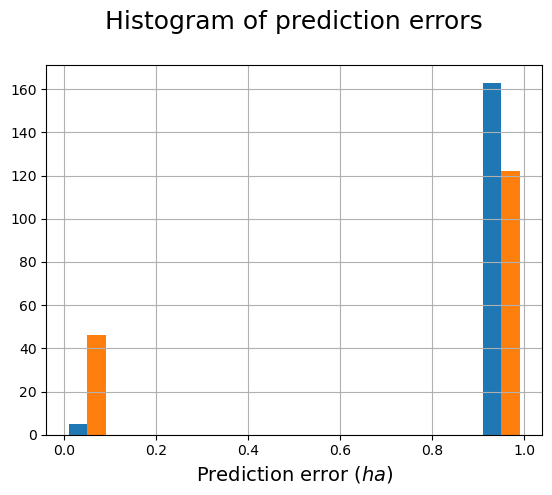

In [42]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist((pred_test ,y_test),bins=10)

In [43]:
tmodel = TSNE(n_components=2)
tcomps = tmodel.fit_transform(X,Y)

In [44]:
tcomps

array([[ -0.96676606,   1.7571622 ],
       [-12.406043  ,   0.58455133],
       [-10.238057  ,  -0.38858786],
       ...,
       [  5.939564  , -20.91678   ],
       [ 19.706486  , -11.274638  ],
       [  2.871951  ,   0.32263935]], dtype=float32)

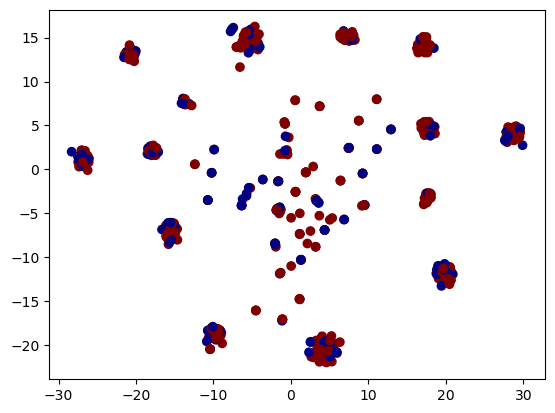

In [45]:
plt.scatter(tcomps[:,0], tcomps[:,1], c= Y, cmap='jet')

##  RandomForestClassifier

## Hypertunning of Parameter

In [47]:
# Create the model
model = RandomForestClassifier()

# Define the grid search parameters
tuned_paramerters= [{'n_estimators':[10,30,50,70,90],
                     'max_depth': [5,10,15,20],
                     'criterion': ['gini','entropy'],
                    }]


param_grid = tuned_paramerters

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [48]:
grid_result= grid.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 1/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.986 total time=   0.0s
[CV 2/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 2/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.985 total time=   0.0s
[CV 3/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 3/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 4/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.985 total time=   0.0s
[CV 5/5; 1/40] START criterion=gini, max_depth=5, n_estimators=10...............
[CV 5/5; 1/40] END criterion=gini, max_depth=5, n_estimators=10;, score=0.971 total time=   0.0s
[CV 1/5; 2/40] START criterion=gini, max_depth=5

[CV 3/5; 10/40] END criterion=gini, max_depth=10, n_estimators=90;, score=1.000 total time=   0.2s
[CV 4/5; 10/40] START criterion=gini, max_depth=10, n_estimators=90.............
[CV 4/5; 10/40] END criterion=gini, max_depth=10, n_estimators=90;, score=0.985 total time=   0.2s
[CV 5/5; 10/40] START criterion=gini, max_depth=10, n_estimators=90.............
[CV 5/5; 10/40] END criterion=gini, max_depth=10, n_estimators=90;, score=1.000 total time=   0.1s
[CV 1/5; 11/40] START criterion=gini, max_depth=15, n_estimators=10.............
[CV 1/5; 11/40] END criterion=gini, max_depth=15, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5; 11/40] START criterion=gini, max_depth=15, n_estimators=10.............
[CV 2/5; 11/40] END criterion=gini, max_depth=15, n_estimators=10;, score=0.985 total time=   0.0s
[CV 3/5; 11/40] START criterion=gini, max_depth=15, n_estimators=10.............
[CV 3/5; 11/40] END criterion=gini, max_depth=15, n_estimators=10;, score=1.000 total time=   0.0s
[

[CV 5/5; 19/40] END criterion=gini, max_depth=20, n_estimators=70;, score=1.000 total time=   0.1s
[CV 1/5; 20/40] START criterion=gini, max_depth=20, n_estimators=90.............
[CV 1/5; 20/40] END criterion=gini, max_depth=20, n_estimators=90;, score=1.000 total time=   0.2s
[CV 2/5; 20/40] START criterion=gini, max_depth=20, n_estimators=90.............
[CV 2/5; 20/40] END criterion=gini, max_depth=20, n_estimators=90;, score=0.985 total time=   0.1s
[CV 3/5; 20/40] START criterion=gini, max_depth=20, n_estimators=90.............
[CV 3/5; 20/40] END criterion=gini, max_depth=20, n_estimators=90;, score=1.000 total time=   0.1s
[CV 4/5; 20/40] START criterion=gini, max_depth=20, n_estimators=90.............
[CV 4/5; 20/40] END criterion=gini, max_depth=20, n_estimators=90;, score=0.985 total time=   0.1s
[CV 5/5; 20/40] START criterion=gini, max_depth=20, n_estimators=90.............
[CV 5/5; 20/40] END criterion=gini, max_depth=20, n_estimators=90;, score=1.000 total time=   0.1s
[

[CV 2/5; 29/40] END criterion=entropy, max_depth=10, n_estimators=70;, score=0.985 total time=   0.1s
[CV 3/5; 29/40] START criterion=entropy, max_depth=10, n_estimators=70..........
[CV 3/5; 29/40] END criterion=entropy, max_depth=10, n_estimators=70;, score=1.000 total time=   0.1s
[CV 4/5; 29/40] START criterion=entropy, max_depth=10, n_estimators=70..........
[CV 4/5; 29/40] END criterion=entropy, max_depth=10, n_estimators=70;, score=1.000 total time=   0.1s
[CV 5/5; 29/40] START criterion=entropy, max_depth=10, n_estimators=70..........
[CV 5/5; 29/40] END criterion=entropy, max_depth=10, n_estimators=70;, score=0.985 total time=   0.1s
[CV 1/5; 30/40] START criterion=entropy, max_depth=10, n_estimators=90..........
[CV 1/5; 30/40] END criterion=entropy, max_depth=10, n_estimators=90;, score=1.000 total time=   0.1s
[CV 2/5; 30/40] START criterion=entropy, max_depth=10, n_estimators=90..........
[CV 2/5; 30/40] END criterion=entropy, max_depth=10, n_estimators=90;, score=0.985 to

[CV 3/5; 38/40] END criterion=entropy, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 4/5; 38/40] START criterion=entropy, max_depth=20, n_estimators=50..........
[CV 4/5; 38/40] END criterion=entropy, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 5/5; 38/40] START criterion=entropy, max_depth=20, n_estimators=50..........
[CV 5/5; 38/40] END criterion=entropy, max_depth=20, n_estimators=50;, score=1.000 total time=   0.0s
[CV 1/5; 39/40] START criterion=entropy, max_depth=20, n_estimators=70..........
[CV 1/5; 39/40] END criterion=entropy, max_depth=20, n_estimators=70;, score=1.000 total time=   0.1s
[CV 2/5; 39/40] START criterion=entropy, max_depth=20, n_estimators=70..........
[CV 2/5; 39/40] END criterion=entropy, max_depth=20, n_estimators=70;, score=0.985 total time=   0.1s
[CV 3/5; 39/40] START criterion=entropy, max_depth=20, n_estimators=70..........
[CV 3/5; 39/40] END criterion=entropy, max_depth=20, n_estimators=70;, score=1.000 to

In [49]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9970588235294118, using {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 70}
0.9853367433930094,0.009301207347881783 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}
0.9941176470588236,0.007204381596421085 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 30}
0.9941176470588236,0.007204381596421087 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
0.9970588235294118,0.00588235294117645 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 70}
0.9970588235294118,0.00588235294117645 with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 90}
0.9853367433930094,0.009301207347881783 with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}
0.9970588235294118,0.00588235294117645 with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 30}
0.9911764705882353,0.011764705882352938 with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
0.9941176470588236,0.007204381596421087 with: {'criterion': 'gini', 'max_dept

## Best : 0.9971014492753623, using {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 70}

In [60]:
rf_model = RandomForestClassifier(criterion='gini', n_estimators=70, max_depth=5, random_state=42)

In [61]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=70, random_state=42)

In [62]:
train_pred_rf = rf_model.predict(x_train)

In [63]:
confusion_matrix(y_train,train_pred_rf)

array([[ 92,   0],
       [  0, 249]], dtype=int64)

In [64]:
print(classification_report(y_train,train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       249

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341



In [65]:
test_pred_rf_1 = rf_model.predict(x_test)

In [66]:
confusion_matrix(y_test,test_pred_rf_1)

array([[ 46,   0],
       [  0, 122]], dtype=int64)

In [67]:
print(classification_report(y_test,test_pred_rf_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       122

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



In [68]:
fpr, tpr, thresh = roc_curve(y_test,test_pred_rf_1)

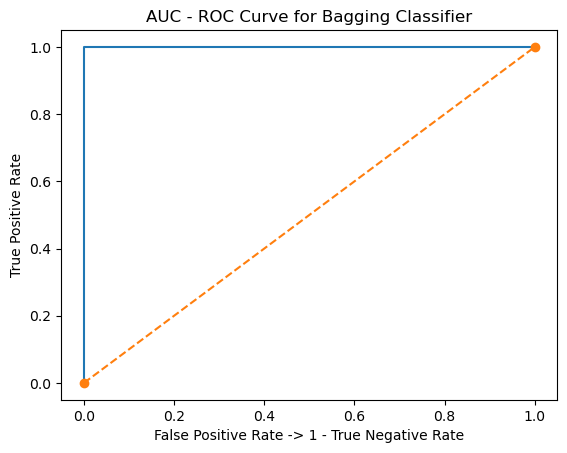

In [69]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.title('AUC - ROC Curve for Bagging Classifier')
plt.xlabel('False Positive Rate -> 1 - True Negative Rate')
plt.ylabel('True Positive Rate')
plt.show()